In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.1 MB/s eta 0:00:00


## Stanford Sentiment TreeBank (SST-2)

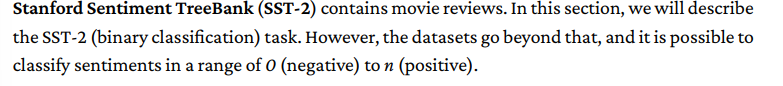

In [3]:
from transformers import pipeline
nlp=pipeline("sentiment-analysis",device=0)
print(nlp("If you sometimes like to go to the movies to have fun , Wasabi is a good place to start ."),"If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .")
print(nlp("Effective but too-tepid biopic."),"Effective but too-tepid biopic.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POSITIVE', 'score': 0.9998257756233215}] If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .
[{'label': 'NEGATIVE', 'score': 0.9974064230918884}] Effective but too-tepid biopic.


## Microsoft Research Paraphrase Corpus (MRPC)
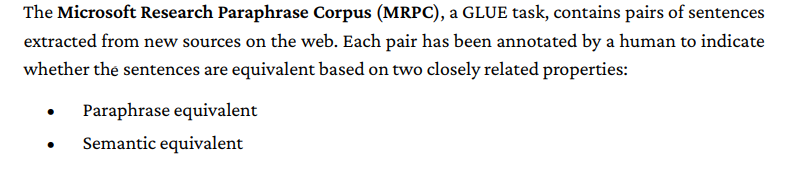


In [6]:
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification
import tensorflow as tf
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")

In [8]:
model=TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")
classes = ["not paraphrase", "is paraphrase"]

sequence_A = "The DVD-CCA then appealed to the state Supreme Court."
sequence_B = "The DVD CCA appealed that decision to the U.S. Supreme Court."

Some layers from the model checkpoint at bert-base-cased-finetuned-mrpc were not used when initializing TFBertForSequenceClassification: ['dropout_183']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at bert-base-cased-finetuned-mrpc.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [13]:
paraphrase=tokenizer.encode_plus(sequence_A,sequence_B,return_tensors='tf')
paraphrase_classification_logits=model(paraphrase)[0]
paraphrase_classification_logits

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.41682327,  2.0175064 ]], dtype=float32)>

In [16]:
paraphrase_results = tf.nn.softmax(paraphrase_classification_logits,axis=1).numpy()[0]
paraphrase_results

array([0.08059208, 0.9194079 ], dtype=float32)

In [17]:
print(sequence_B, "should be a paraphrase")
for i in range(len(classes)):
    print(f"{classes[i]}: {round(paraphrase_results[i] * 100)}%")

The DVD CCA appealed that decision to the U.S. Supreme Court. should be a paraphrase
not paraphrase: 8%
is paraphrase: 92%


## Named Entity Recognition(NER)

In [19]:
from transformers import pipeline
nlp=pipeline("ner")
sequence="Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very" \
           "close to the Manhattan Bridge which is visible from the window."

print(nlp(sequence))

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'I-ORG', 'score': 0.9995635, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': 0.99159384, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}, {'entity': 'I-ORG', 'score': 0.99826705, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}, {'entity': 'I-ORG', 'score': 0.9994404, 'index': 4, 'word': 'Inc', 'start': 13, 'end': 16}, {'entity': 'I-LOC', 'score': 0.99943465, 'index': 11, 'word': 'New', 'start': 40, 'end': 43}, {'entity': 'I-LOC', 'score': 0.99932706, 'index': 12, 'word': 'York', 'start': 44, 'end': 48}, {'entity': 'I-LOC', 'score': 0.9993864, 'index': 13, 'word': 'City', 'start': 49, 'end': 53}, {'entity': 'I-LOC', 'score': 0.9825622, 'index': 19, 'word': 'D', 'start': 79, 'end': 80}, {'entity': 'I-LOC', 'score': 0.93698275, 'index': 20, 'word': '##UM', 'start': 80, 'end': 82}, {'entity': 'I-LOC', 'score': 0.89870965, 'index': 21, 'word': '##BO', 'start': 82, 'end': 84}, {'entity': 'I-LOC', 'score': 0.97582406, 'index': 29, 'word': 'Man

In [20]:
#@title Winograd schemas

In [21]:
from transformers import pipeline
translator=pipeline("translation_en_to_fr")
print(translator("The car could not go in the garage because it was too big.",))


No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': "La voiture ne pouvait pas aller dans le garage parce qu'elle était trop grosse."}]
